# 4 Topic Modeling
## Der Code für Kapitel 7 in https://dennisfriedl.de/blog/text_mining_amtspresse
### Die Pfade müssen angepasst werden!


In [ ]:
import pandas as pd # Für die Analyse der Daten
import matplotlib.pyplot as plt # Für die graphische Darstellung

In [2]:
# lädt die Metadaten als Dataframes
df_PC = pd.read_csv("../Data/TopicModeling/ProvinzialCorrespondenz/output_csv/topics-metadata.csv")
df_NM = pd.read_csv("../Data/TopicModeling/NeuesteMittheilungen/output_csv/topics-metadata.csv")

# PC

In [3]:
df_PC.head()

,docId,filename,Dateiname,Zeitungsname,Tag,Monat,Jahr,Jahr_Monat,Jahr_Monat_Tag,Artikelanzahl_in_der_Ausgabe,...,10 herren regierung herr,11 sozialdemokratie gesellschaft presse,12 berathung kommission session,13 partei fortschrittspartei liberalen,14 regierung entwickelung bedeutung,15 staatsregierung frage gesetzgebung,16 frankreich französischen elsaß,17 marine schiffe eisenbahnen,18 preußen schleswig oesterreich,19 deutschen bundes regierungen
0,0,18630701-1.txt,18630701-1.txt,ProvinzialCorrespondenz,1,7,1863,1863-07,1863-07-01,9,...,0.227643,0.044579,0.151060,0.000178,0.000637,0.054740,0.000159,0.017363,0.032257,0.010063
1,1,18630701-2.txt,18630701-2.txt,ProvinzialCorrespondenz,1,7,1863,1863-07,1863-07-01,9,...,0.067960,0.000671,0.002177,0.001185,0.004245,0.002515,0.001060,0.000437,0.000889,0.001192
2,2,18630701-3.txt,18630701-3.txt,ProvinzialCorrespondenz,1,7,1863,1863-07,1863-07-01,9,...,0.003214,0.001052,0.003415,0.001859,0.006659,0.081491,0.001663,0.000686,0.001394,0.001870
3,3,18630701-4.txt,18630701-4.txt,ProvinzialCorrespondenz,1,7,1863,1863-07,1863-07-01,9,...,0.000897,0.000293,0.029794,0.000518,0.009068,0.015522,0.000464,0.000191,0.000389,0.000522
4,4,18630701-5.txt,18630701-5.txt,ProvinzialCorrespondenz,1,7,1863,1863-07,1863-07-01,9,...,0.124238,0.088319,0.001162,0.009429,0.600398,0.001343,0.000566,0.000233,0.000474,0.000636


In [4]:
df_PC_sum = df_PC.sum(numeric_only=True).reset_index() # Die Summe aller Zeilen
df_PC_sum = df_PC_sum.set_index(['index'])
df_PC_sum = df_PC_sum.iloc[8:,:].astype("int32") # In Integer umwandeln
df_PC_sum = df_PC_sum.sort_values(by=[0], ascending=False) # Ordnen

df_PC_sum

,0
index,
2 kaiser majestät baden,1318
14 regierung entwickelung bedeutung,948
12 berathung kommission session,782
4 deutschen volk deutsche,573
15 staatsregierung frage gesetzgebung,516
10 herren regierung herr,475
7 minister majestät könig,409
0 armee truppen general,388
5 majestät könig se,384


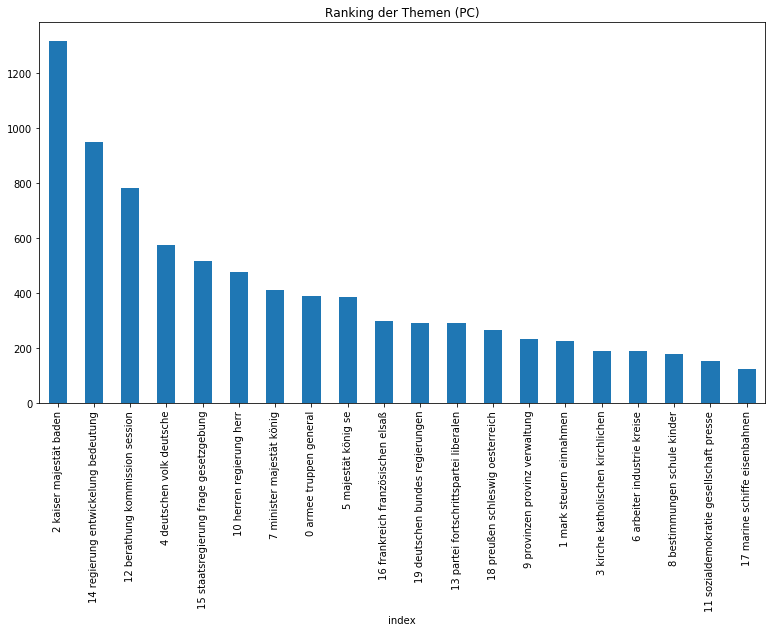

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_PC_sum.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen (PC)',
                  )
ax.get_legend().remove()
plt.savefig('Ranking_Themen_PC.png', bbox_inches='tight')

In [6]:
df_PC_year = df_PC.groupby(df_PC.loc[:,'Jahr']).mean()
df_PC_year.head()

,docId,Tag,Monat,Artikelanzahl_in_der_Ausgabe,Stelle_in_der_Artikelanzahl,Woerteranzahl_Artikel,Woerteranzahl_Ausgabe,0 armee truppen general,1 mark steuern einnahmen,2 kaiser majestät baden,...,10 herren regierung herr,11 sozialdemokratie gesellschaft presse,12 berathung kommission session,13 partei fortschrittspartei liberalen,14 regierung entwickelung bedeutung,15 staatsregierung frage gesetzgebung,16 frankreich französischen elsaß,17 marine schiffe eisenbahnen,18 preußen schleswig oesterreich,19 deutschen bundes regierungen
Jahr,,,,,,,,,,,,,,,,,,,,,
1863,92.0,14.794595,9.318919,7.248649,4.124324,351.372973,2404.178378,0.035327,0.007069,0.179838,...,0.066672,0.049056,0.041405,0.052969,0.134538,0.025342,0.057544,0.007208,0.086507,0.010832
1864,412.5,16.179825,6.381579,9.991228,5.495614,380.484649,3568.232456,0.202291,0.007860,0.118496,...,0.039598,0.012366,0.021531,0.019442,0.105989,0.016301,0.019291,0.030157,0.147074,0.009074
1865,833.5,15.230570,6.668394,7.787565,4.393782,408.963731,3120.634715,0.019383,0.028259,0.143274,...,0.053225,0.014615,0.072498,0.043511,0.148932,0.039881,0.013253,0.039212,0.125879,0.014417
1866,1238.0,15.808511,6.208038,9.647754,5.323877,473.628842,4336.834515,0.077985,0.015920,0.055373,...,0.050893,0.014303,0.073759,0.030029,0.172840,0.030869,0.021483,0.013435,0.131269,0.032130
1867,1671.0,16.148984,6.577878,9.781038,5.390519,425.902935,3874.451467,0.027294,0.024029,0.099176,...,0.046119,0.006639,0.084522,0.042624,0.154864,0.028628,0.028493,0.011693,0.048052,0.111398


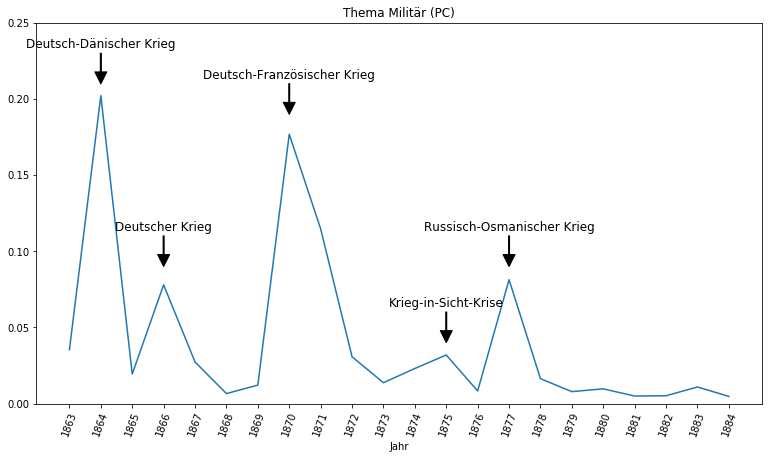

In [23]:
df_PC_militär = df_PC_year.iloc[:, 7]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
plt.xticks(range(1863, 1885))
ax.annotate('Deutsch-Dänischer Krieg', xy=(1864, 0.21),
            xytext=(1864, 0.24), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Deutscher Krieg', xy=(1866, 0.09),
            xytext=(1866, 0.12), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Deutsch-Französischer Krieg', xy=(1870, 0.19),
            xytext=(1870, 0.22), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Krieg-in-Sicht-Krise', xy=(1875, 0.04),
            xytext=(1875, 0.07), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Russisch-Osmanischer Krieg', xy=(1877, 0.09),
            xytext=(1877, 0.12), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
df_PC_militär.plot(kind='line',
                  ax=ax,
                  title='Thema Militär (PC)',
                  ylim=[0,0.25],
                  )
plt.xticks(rotation=70)
plt.savefig('Thema_Militär_PC.png', bbox_inches='tight')

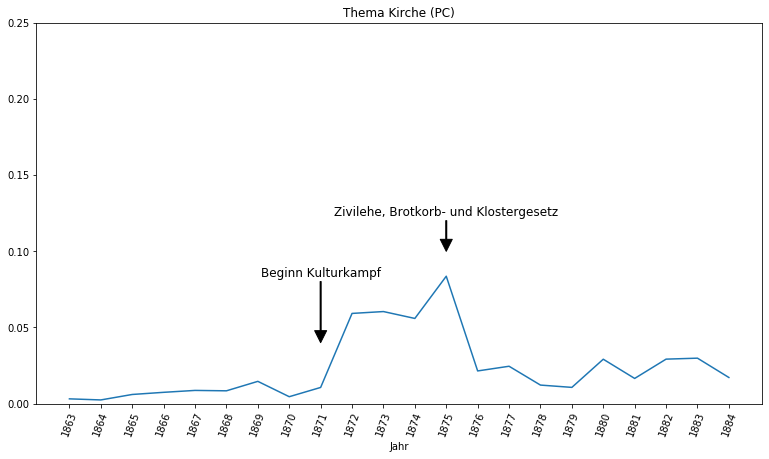

In [8]:
df_PC_kirche = df_PC_year.iloc[:, 10]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
plt.xticks(range(1863, 1885))
ax.annotate('Beginn Kulturkampf', xy=(1871, 0.04),
            xytext=(1871, 0.09), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Zivilehe, Brotkorb- und Klostergesetz', xy=(1875, 0.1),
            xytext=(1875, 0.13), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
df_PC_kirche.plot(kind='line',
                  ax=ax,
                  title='Thema Kirche (PC)',
                  ylim=[0,0.25],
                  )
plt.xticks(rotation=70)
plt.savefig('Thema_Kirche_PC.png', bbox_inches='tight')

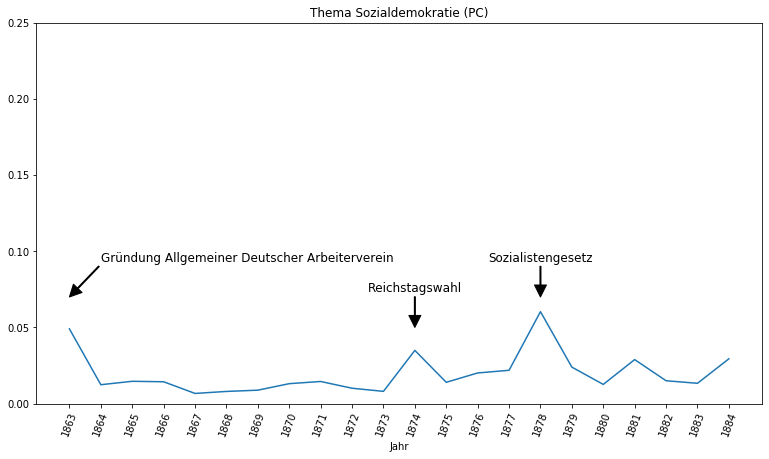

In [34]:
df_PC_sozialdemokratie = df_PC_year.iloc[:, 18]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
plt.xticks(range(1863, 1885))
ax.annotate('Reichstagswahl', xy=(1874, 0.05),
            xytext=(1874, 0.08), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Sozialistengesetz', xy=(1878, 0.07),
            xytext=(1878, 0.10), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Gründung Allgemeiner Deutscher Arbeiterverein', xy=(1863, 0.07),
            xytext=(1864, 0.10), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='left', verticalalignment='top',fontsize=12
            )
df_PC_sozialdemokratie.plot(kind='line',
                  ax=ax,
                  title='Thema Sozialdemokratie (PC)',
                  ylim=[0,0.25],
                  )

plt.xticks(rotation=70)
plt.savefig('Thema_Sozialdemokratie_PC.png', bbox_inches='tight')

# NM

In [10]:
df_NM_sum = df_NM.sum(numeric_only=True).reset_index()
df_NM_sum = df_NM_sum.set_index(['index'])
df_NM_sum = df_NM_sum.iloc[8:,:].astype("int32")
df_NM_sum = df_NM_sum.sort_values(by=[0], ascending=False)

df_NM_sum

,0
index,
8 regierung interessen interesse,2220
1 kaiser berlin majestät,1636
10 bestimmungen gesetzes gesetz,1510
12 dr regierungs ernannt,1484
11 industrie preise lage,1272
4 frankreich regierung rußland,1254
19 antrag reichstag vorlage,1180
17 partei herr socialdemokratie,856
0 kaiser deutschen kaisers,819


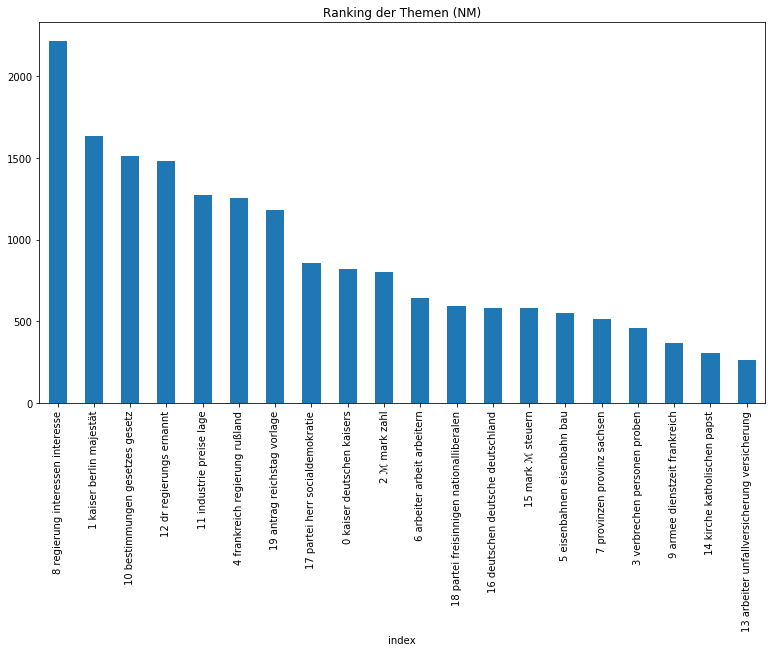

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_NM_sum.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen (NM)',
                  )

ax.get_legend().remove()
plt.savefig('Ranking_Themen_NM.png', bbox_inches='tight')

In [12]:
df_NM_year = df_NM.groupby(df_NM.loc[:,'Jahr']).mean()
df_NM_year.tail()

,docId,Tag,Monat,Artikelanzahl_in_der_Ausgabe,Stelle_in_der_Artikelanzahl,Woerteranzahl_Artikel,Woerteranzahl_Ausgabe,0 kaiser deutschen kaisers,1 kaiser berlin majestät,2 ℳ mark zahl,...,10 bestimmungen gesetzes gesetz,11 industrie preise lage,12 dr regierungs ernannt,13 arbeiter unfallversicherung versicherung,14 kirche katholischen papst,15 mark ℳ steuern,16 deutschen deutsche deutschland,17 partei herr socialdemokratie,18 partei freisinnigen nationalliberalen,19 antrag reichstag vorlage
Jahr,,,,,,,,,,,,,,,,,,,,,
1889,12294.0,15.266293,6.175193,14.735109,7.867554,298.018220,4255.374212,0.053414,0.160907,0.027870,...,0.074663,0.061574,0.102848,0.015035,0.006941,0.023352,0.063947,0.036827,0.021565,0.046012
1890,13591.5,15.914384,6.084760,12.133562,6.566781,335.150685,3875.371575,0.051288,0.121408,0.036078,...,0.111596,0.045961,0.081287,0.025243,0.010919,0.033009,0.047074,0.054051,0.025268,0.053964
1891,14725.5,15.383636,6.477273,11.314545,6.157273,346.835455,3815.092727,0.036880,0.095371,0.052775,...,0.088810,0.070653,0.085262,0.014480,0.009371,0.029959,0.040056,0.056191,0.014440,0.055504
1893,15898.0,15.201606,6.361446,11.231325,6.115663,371.107631,3991.979920,0.035252,0.042376,0.089235,...,0.065398,0.049260,0.070822,0.011925,0.010481,0.048615,0.021898,0.076060,0.054608,0.054319
1894,17209.0,15.732752,6.517792,15.310821,8.155410,305.128540,4437.790850,0.039824,0.052457,0.090245,...,0.107112,0.054057,0.100352,0.020899,0.007316,0.033075,0.036059,0.055664,0.012052,0.043342


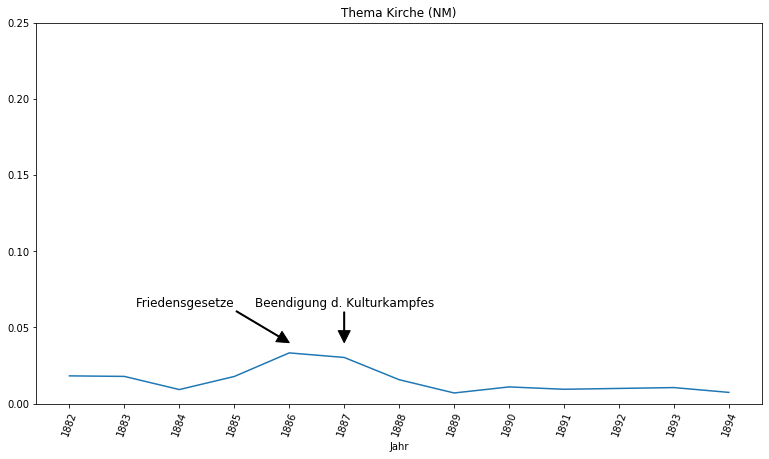

In [13]:
df_NM_kirche = df_NM_year.iloc[:, 21]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
plt.xticks(range(1882, 1895))
ax.annotate('Friedensgesetze', xy=(1886, 0.04),
            xytext=(1885, 0.07), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',fontsize=12
            )
ax.annotate('Beendigung d. Kulturkampfes', xy=(1887, 0.04),
            xytext=(1887, 0.07), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
df_NM_kirche.plot(kind='line',
                  ax=ax,
                  title='Thema Kirche (NM)',
                  ylim=[0,0.25],
                  )
plt.xticks(rotation=70)
plt.savefig('Thema_Kirche_NM.png', bbox_inches='tight')

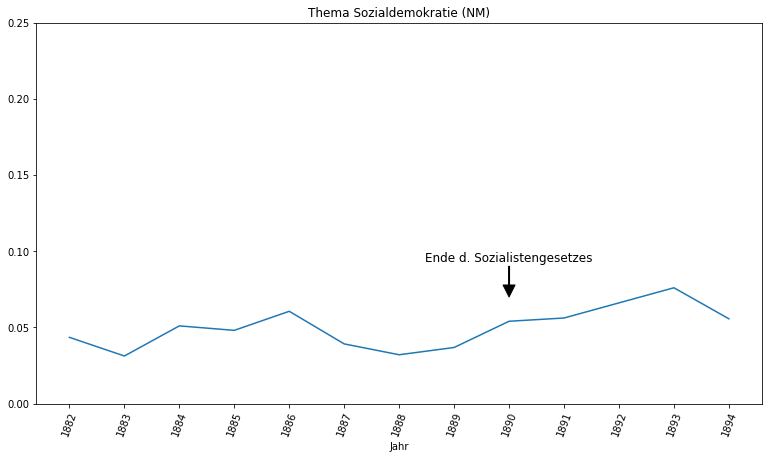

In [14]:
df_NM_sozialdemokratie = df_NM_year.iloc[:, 24]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
plt.xticks(range(1882, 1895))
ax.annotate('Ende d. Sozialistengesetzes', xy=(1890, 0.07),
            xytext=(1890, 0.1), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
df_NM_sozialdemokratie.plot(kind='line',
                  ax=ax,
                  title='Thema Sozialdemokratie (NM)',
                  ylim=[0,0.25],
                  )
plt.xticks(rotation=70)
plt.savefig('Thema_Sozialdemokratie_NM.png', bbox_inches='tight')

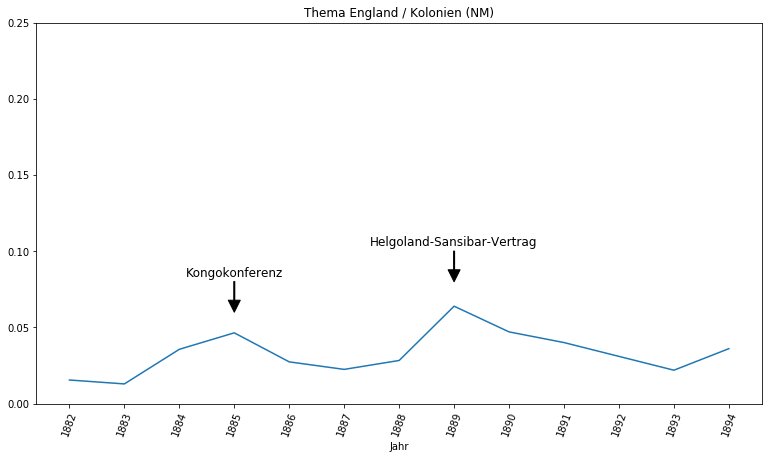

In [15]:
df_NM_kolonien = df_NM_year.iloc[:, 23]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
plt.xticks(range(1882, 1895))
ax.annotate('Kongokonferenz', xy=(1885, 0.06),
            xytext=(1885, 0.09), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
ax.annotate('Helgoland-Sansibar-Vertrag', xy=(1889, 0.08),
            xytext=(1889, 0.11), 
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='center', verticalalignment='top',fontsize=12
            )
df_NM_kolonien.plot(kind='line',
                  ax=ax,
                  title='Thema England / Kolonien (NM)',
                  ylim=[0,0.25],
                  )
plt.xticks(rotation=70)
plt.savefig('Thema_Kolonien_NM.png', bbox_inches='tight')

In [16]:
df_NM_ueberschriften = df_NM.groupby(["Ueberschrift"]).sum()
df_NM_ueberschriften.head(2)

,docId,Tag,Monat,Jahr,Artikelanzahl_in_der_Ausgabe,Stelle_in_der_Artikelanzahl,Woerteranzahl_Artikel,Woerteranzahl_Ausgabe,0 kaiser deutschen kaisers,1 kaiser berlin majestät,...,10 bestimmungen gesetzes gesetz,11 industrie preise lage,12 dr regierungs ernannt,13 arbeiter unfallversicherung versicherung,14 kirche katholischen papst,15 mark ℳ steuern,16 deutschen deutsche deutschland,17 partei herr socialdemokratie,18 partei freisinnigen nationalliberalen,19 antrag reichstag vorlage
Ueberschrift,,,,,,,,,,,,,,,,,,,,,
"(Am zweiten Tage der Polendebatte, 29. Januar.)",5617,30,1,1886,10,5,3525,9999,0.116304,0.000063,...,0.000093,0.000059,0.000043,0.000018,0.018461,0.065782,0.000033,0.282271,0.065778,0.059405
(Aus einem Bericht des Kaiserlichen General-Konsulats in Shanghai).,825,29,11,1882,14,4,522,4883,0.000276,0.000314,...,0.008421,0.374313,0.004190,0.000090,0.000107,0.000207,0.417948,0.008292,0.000185,0.000389


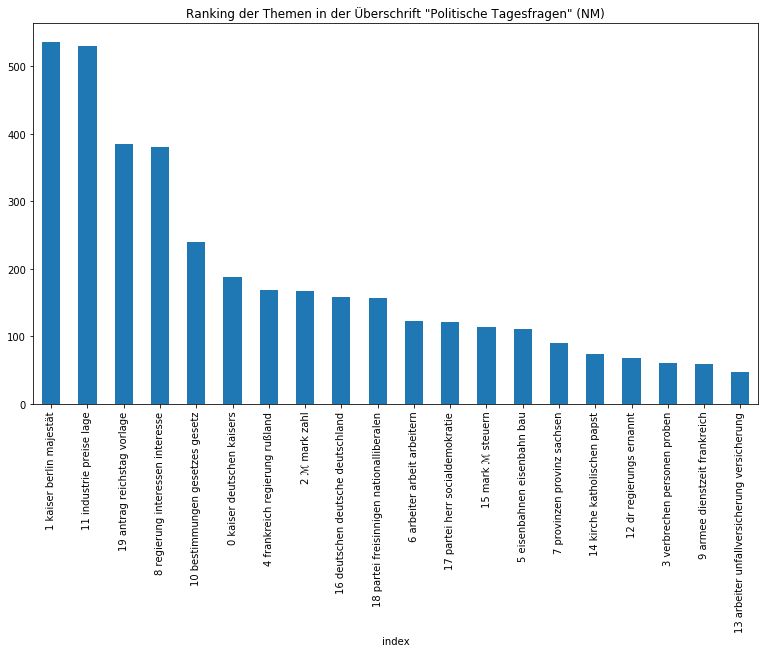

In [17]:
df_NM_Politische_Tagesfragen = df_NM_ueberschriften.loc[["Politische Tagesfragen."]]
df_NM_Politische_Tagesfragen = df_NM_Politische_Tagesfragen.sum(numeric_only=True).reset_index()
df_NM_Politische_Tagesfragen = df_NM_Politische_Tagesfragen.set_index(['index'])
df_NM_Politische_Tagesfragen = df_NM_Politische_Tagesfragen.iloc[8:,:].astype("int32")
df_NM_Politische_Tagesfragen = df_NM_Politische_Tagesfragen.sort_values(by=[0], ascending=False)
df_NM_Politische_Tagesfragen.head()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_NM_Politische_Tagesfragen.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen in der Überschrift "Politische Tagesfragen" (NM)',
                  )
ax.get_legend().remove()
plt.savefig('Ranking_Ueberschriften_Tagesfragen.png', bbox_inches='tight')

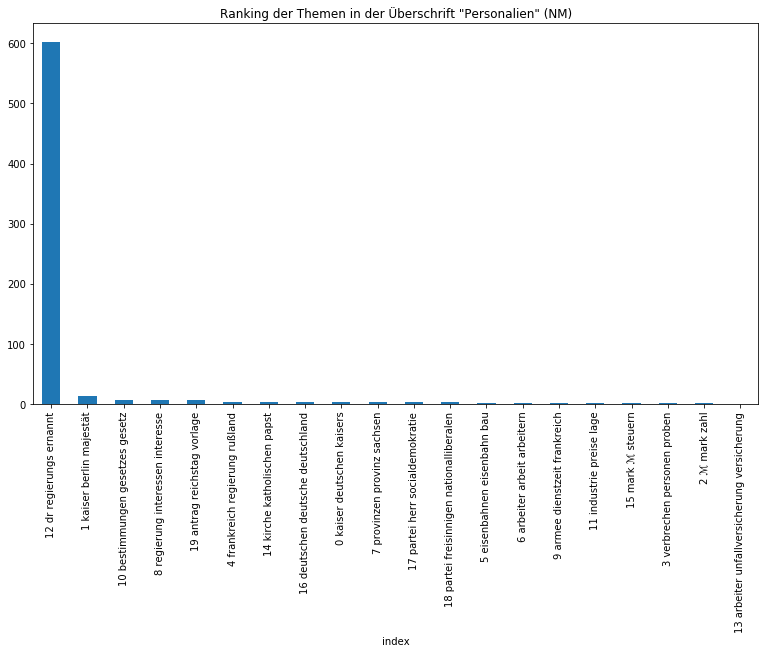

In [18]:
df_NM_Personalien = df_NM_ueberschriften.loc[["Personalien."]]
df_NM_Personalien = df_NM_Personalien.sum(numeric_only=True).reset_index()
df_NM_Personalien = df_NM_Personalien.set_index(['index'])
df_NM_Personalien = df_NM_Personalien.iloc[8:,:].astype("int32")
df_NM_Personalien = df_NM_Personalien.sort_values(by=[0], ascending=False)
df_NM_Personalien.head()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_NM_Personalien.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen in der Überschrift "Personalien" (NM)',
                  )
ax.get_legend().remove()
plt.savefig('Ranking_Ueberschriften_Personalien.png', bbox_inches='tight')

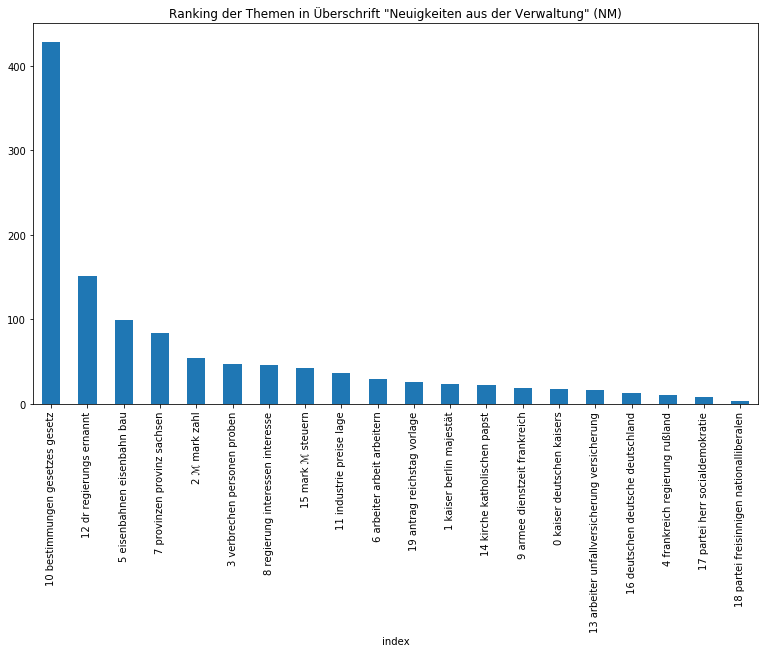

In [19]:
df_NM_Verwaltung = df_NM_ueberschriften.loc[["Neuigkeiten aus der Verwaltung."]]
df_NM_Verwaltung = df_NM_Verwaltung.sum(numeric_only=True).reset_index()
df_NM_Verwaltung = df_NM_Verwaltung.set_index(['index'])
df_NM_Verwaltung = df_NM_Verwaltung.iloc[8:,:].astype("int32")
df_NM_Verwaltung = df_NM_Verwaltung.sort_values(by=[0], ascending=False)
df_NM_Verwaltung.head()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_NM_Verwaltung.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen in Überschrift "Neuigkeiten aus der Verwaltung" (NM)',
                  )
ax.get_legend().remove()
plt.savefig('Ranking_Ueberschriften_Verwaltung.png', bbox_inches='tight')

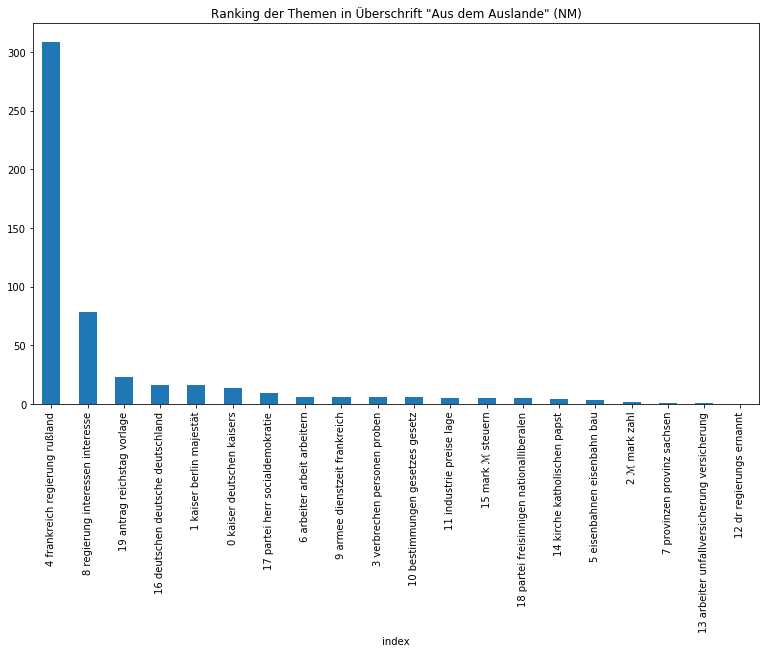

In [20]:
df_NM_ausland = df_NM_ueberschriften.loc[["Aus dem Auslande."]]
df_NM_ausland = df_NM_ausland.sum(numeric_only=True).reset_index()
df_NM_ausland = df_NM_ausland.set_index(['index'])
df_NM_ausland = df_NM_ausland.iloc[8:,:].astype("int32")
df_NM_ausland = df_NM_ausland.sort_values(by=[0], ascending=False)
df_NM_ausland.head()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_NM_ausland.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen in Überschrift "Aus dem Auslande" (NM)',
                  )
ax.get_legend().remove()
plt.savefig('Ranking_Ueberschriften_Ausland.png', bbox_inches='tight')

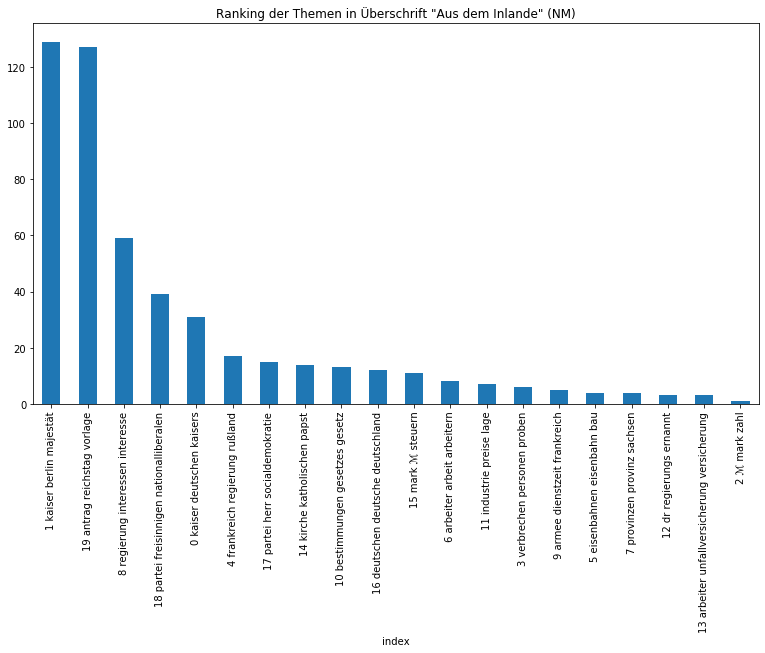

In [21]:
df_NM_inland = df_NM_ueberschriften.loc[["Aus dem Inlande."]]
df_NM_inland = df_NM_inland.sum(numeric_only=True).reset_index()
df_NM_inland = df_NM_inland.set_index(['index'])
df_NM_inland = df_NM_inland.iloc[8:,:].astype("int32")
df_NM_inland = df_NM_inland.sort_values(by=[0], ascending=False)
df_NM_ausland.head()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,7))
df_NM_inland.plot(kind='bar',
                  ax=ax,
                  title='Ranking der Themen in Überschrift "Aus dem Inlande" (NM)',
                  )
ax.get_legend().remove()
plt.savefig('Ranking_Ueberschriften_Inland.png', bbox_inches='tight')